# **Part 1: Collecting the data using APIS:**


In [ ]:
import requests
import time
import random
import json
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
api1 = "RGAPI-95bb8d20-ba0b-4a6e-be2a-2037497f9439"
api2 = "RGAPI-6f64996d-43ef-48e6-9b0a-b2305e9dfaa0"
apis =[api1, api2]

### Get leagues function:
to extract the ranked Ranked Solo/Duo (RANKED_SOLO_5x5) summoners.

In [ ]:
def get_leagues(platform, api):

  leagues = ['challengerleagues', 'grandmasterleagues', 'masterleagues', 'DIAMOND', 'PLATINUM', 'GOLD', 'SILVER', 'BRONZE', 'IRON']

  # Challenger (0.1 of 1000)
  url_challenger = 'https://'+ platform + '.api.riotgames.com/lol/league/v4/'+ leagues[0]  + '/by-queue/RANKED_SOLO_5x5?api_key=' + api
  response = requests.get(url_challenger)
  lis = response.json()['entries']
  summonerName_c = [ lis[0]['summonerName'] ]

  # GrandMaster (0.25 of 1000)
  url_grandmaster = 'https://'+ platform + '.api.riotgames.com/lol/league/v4/'+ leagues[1]  + '/by-queue/RANKED_SOLO_5x5?api_key=' + api
  response = requests.get(url_grandmaster)
  lis = response.json()['entries']
  summonerName_gm = [ lis[0]['summonerName'] ]

  # Master (2 of 1000)
  url_master = 'https://'+ platform + '.api.riotgames.com/lol/league/v4/'+ leagues[2]  + '/by-queue/RANKED_SOLO_5x5?api_key=' + api
  response = requests.get(url_master)
  lis = response.json()['entries']
  summonerName_m = [sub['summonerName'] for sub in lis[0:2]]

  # Diamond (16 of 1000)
  url_diamond = 'https://' + platform.lower() +'.api.riotgames.com/lol/league/v4/entries/RANKED_SOLO_5x5/' + leagues[3] + '/IV?page=1&api_key=' + api
  response = requests.get(url_diamond)
  lis = response.json()
  summonerName_d = [dic['summonerName'] for dic in lis[0:16]]

  # Platinum (120 of 1000)
  url_platinum = 'https://' + platform.lower() +'.api.riotgames.com/lol/league/v4/entries/RANKED_SOLO_5x5/' + leagues[4] + '/IV?page=1&api_key=' + api
  response = requests.get(url_platinum)
  lis = response.json()
  summonerName_p = [dic['summonerName'] for dic in lis[0:120]]

  # Gold (290 of 1000)
  url_gold = 'https://' + platform.lower() +'.api.riotgames.com/lol/league/v4/entries/RANKED_SOLO_5x5/' + leagues[5] + '/IV?page=1&api_key=' + api
  response = requests.get(url_gold)
  lis = response.json()
  summonerName_gd = [dic['summonerName'] for dic in lis]  #205
  url_gold = 'https://' + platform.lower() +'.api.riotgames.com/lol/league/v4/entries/RANKED_SOLO_5x5/' + leagues[5] + '/III?page=1&api_key=' + api
  response = requests.get(url_gold)
  lis = response.json()
  summonerName_gd2 = [dic['summonerName'] for dic in lis[0:85]]

  # Silver (360 of 1000)
  url_silver = 'https://' + platform.lower() +'.api.riotgames.com/lol/league/v4/entries/RANKED_SOLO_5x5/' + leagues[6] + '/IV?page=1&api_key=' + api
  response = requests.get(url_silver)
  lis = response.json()
  summonerName_s = [dic['summonerName'] for dic in lis]    #205
  url_silver = 'https://' + platform.lower() +'.api.riotgames.com/lol/league/v4/entries/RANKED_SOLO_5x5/' + leagues[6] + '/III?page=1&api_key=' + api
  response = requests.get(url_silver)
  lis = response.json()
  summonerName_s2 = [dic['summonerName'] for dic in lis[0:155]]

  # Bronze  (180 of 1000)
  url_bronze = 'https://' + platform.lower() +'.api.riotgames.com/lol/league/v4/entries/RANKED_SOLO_5x5/' + leagues[7] + '/IV?page=1&api_key=' + api
  response = requests.get(url_bronze)
  lis = response.json()
  summonerName_b = [dic['summonerName'] for dic in lis[0:180]]

  # Iron (17 of 1000)
  url_iron = 'https://' + platform.lower() +'.api.riotgames.com/lol/league/v4/entries/RANKED_SOLO_5x5/' + leagues[8] + '/IV?page=1&api_key=' + api
  response = requests.get(url_iron)
  lis = response.json()
  summonerName_i = [dic['summonerName'] for dic in lis[0:17]]



  summonerName = summonerName_c + summonerName_gm + summonerName_m + summonerName_d + summonerName_p + summonerName_gd + summonerName_gd2 + summonerName_s + summonerName_s2 + summonerName_b + summonerName_i

  return summonerName

## Get Puuid function:
to get the id of each summoner

In [ ]:
def get_puuid(api, summonerNames, platform ):


    puuid_list = []

    url = 'https://' + platform.lower() + '.api.riotgames.com/lol/summoner/v4/summoners/by-name/'  + summonerNames + '?api_key=' + api
    response = requests.get(url)

    # If any error happens, skip that summoner
    while response.status_code == 429:
      print("Sleeping zzzzzz")
      time.sleep(5)
      response = requests.get(url)

    if response.status_code == 200:
      response = response.json()
      puuid = response['puuid']
      puuid_list.append(puuid)
      print(len(puuid_list))

      return puuid_list
    else:
        return puuid_list


In [ ]:
# get summoners from different platforms and then get the ids of these summoners:

summonerNames_lis = []
api=[]

# Platfor values
platform = ['BR1', 'eun1', 'EUW1', 'JP1', 'KR', 'LA1', 'LA2', 'NA1', 'OC1', 'RU', 'TR1']
mass_region = ['americas','europe', 'europe', 'asia','asia', 'americas', 'americas', 'americas', 'americas', 'asia', 'europe']

indx=0
puuids = []

for region in platform:

  print(region)
  summonerNames = get_leagues(region, apis[indx])
  indx =(indx+1)%2;

  for i in range(0 , len(summonerNames)):
    summonerName = summonerNames[i]
    print(summonerName)

    lis = get_puuid(apis[indx], summonerName , region)
    print(lis)
    if len(lis) > 0:
        puuids = puuids + lis

    print('===========================================', i)
    indx =(indx+1)%2;

  summonerNames_lis = summonerNames_lis + summonerNames


Streaming output truncated to the last 5000 lines.
=========================================== 718
KornilDexx
1
['EiNgLjZYSLn7XiXWemvTG4bC_tFGPQDaNfgqCbUDsQ7QbrMw2UAQBH1-mzy2v6-HOZg4Pwr2PxA-Fw']
=========================================== 719
zzJIokuzz
1
['GS1ikr-P8XAhNKHV4zShlaAY654bKxbu45VwJR2rwoqd8SsNEcrKXI7JAOx-J2tsci-WZxtOH7Os1Q']
=========================================== 720
Maynez
1
['I9I57XfBKCCmG-zdCD2VAl9J1bBqJ2h27rBNk2iRGGylub8swMR7wj6S2vcCnzeg9a2RFr5T9m0s7A']
=========================================== 721
Принцесса Корги
1
['48Al1P5kycmg6FItRgBekEerKshwL1OGZcMMcjwywlKSgzskoSGjoMwEO9Dtsx74KTWH0fhrcjk6hg']
=========================================== 722
Chiba из Интовии
1
['bllmYhumyNc480rk7ocpQEzOAgjj9MrJmWvsA2aZykFLAGtoSYGDEskqYxuvoZR6ZutHgsmP5JjKZg']
=========================================== 723
04LEGENDA
1
['9l8HZZF4Xg98yHuckCBqrjlksheO_yuSHYOuJJdbHgKuhKzqF1yyZnKuO4qWpmPek4brOeJgYFDOUw']
=========================================== 724
Cops007
1
['o16bPGDWVH7rWIVt0xQM

In [ ]:
print('List of summonerNames:',len(summonerNames_lis))

List of summonerNames: 6909


In [ ]:
# save data in json files:

with open('/content/drive/MyDrive/BigData_MiniP2/Data2/summonerNames.json', 'w') as f:
    json.dump(summonerNames_lis, f)

with open('/content/drive/MyDrive/BigData_MiniP2/Data2/puuids.json', 'w') as f:
    json.dump(puuids, f)

In [ ]:
# read the saved files

f = open('/content/drive/MyDrive/BigData_MiniP2/Data2/summonerNames.json')

data = json.load(f)
summonerNames_lis =[]

for i in range(len(data)):
    summonerNames_lis.append(data[i])
f.close()

In [ ]:

f = open('/content/drive/MyDrive/BigData_MiniP2/Data2/puuids.json')

data = json.load(f)
puuids =[]

for i in range(len(data)):
    puuids.append(data[i])
f.close()

## Get match ID function:
to get the ID of the last 25 played match using the puuid of each summoner

In [ ]:
def get_matchId(api, puuid, region):

    matchId_list = []
    no_games =25

    # Get the ids of 20 matches played by that summoner with the puuid
    url = ('https://'+ region +'.api.riotgames.com/lol/match/v5/matches/by-puuid/'+
           puuid +"/ids?start=0" + "&count=" + str(no_games) + "&api_key=" + api)

    response = requests.get(url)

    # If any error happens, skip that summoner
    while response.status_code == 429:
      print("Sleeping zzzzzz")
      time.sleep(5)
      response = requests.get(url)

    if response.status_code == 200:
      response = response.json()
      print(response)
      matchId_list = matchId_list + response
      #print(len(matchId_list))
      return matchId_list

    else:
        return matchId_list


In [ ]:
# Example:
puuid = puuids[0]
match1= get_matchId(apis[0], puuid,'americas')
match1

In [ ]:
# get a list of puuids for all summoners that we have collected above

match_IDs = []
indx =0;

# platform = ['KR', 'LA1', 'LA2', 'NA1', 'OC1', 'RU', 'TR1']
mass_regions= ['asia', 'americas', 'americas', 'americas', 'americas', 'asia', 'europe']
ss = [0, 987, 1974, 2961, 3948, 4935, 5922]
# 0 ==> 987 (asia)
# 988 ==> 4935 (americas)
# 4936 ==> 5922 (asia)
# 5923 ==> end (europe)

for i in range(0 , len(puuids)):

  puuid = puuids[i]
  if i in ss:
    mass_region = mass_regions[ss.index(i)]

  lis = get_matchId(apis[indx], puuid,mass_region)
  indx =(indx+1)%2;

  if len(lis) > 0:
    match_IDs = match_IDs + lis
  print('===========================================', i)


In [ ]:
# save the match ids in json file:
with open('/content/drive/MyDrive/BigData_MiniP2/Data2/matches_ID.json', 'w') as f:
    json.dump(set_matches, f)

In [ ]:

f = open('/content/drive/MyDrive/BigData_MiniP2/Data2/matches_ID.json')

data = json.load(f)
match_IDs =[]

for i in range(len(data)):
    match_IDs.append(data[i])
f.close()

## Get matches Data function:
for each match ID get the whole data information of the match

In [ ]:
def get_matches(apis, matchIds):
  """
  Get the matches from the given matchIds list.

  Inputs:
  - api: Your api key.
  - matchIds: A list of matches played by summoners.

  Output:
  - matches: A dictionary containing matches.
  """
  platforms = ['KR', 'LA', 'NA', 'OC', 'RU', 'TR']
  mass_region = ['asia', 'americas', 'americas', 'americas', 'asia', 'europe']

  matches = []

  i = 0
  indx =0;
  for matchId in matchIds:

    match_platform = matchId[0:2]
    if match_platform in platforms:
      region = mass_region[platforms.index(match_platform)]

    print(matchId)
    time.sleep(0.01)
    api = apis[indx]
    url = 'https://' + region + '.api.riotgames.com/lol/match/v5/matches/' + matchId + '?api_key=' + api
    response = requests.get(url)
    indx = (indx+1)%2

    while response.status_code == 429:
      print("Sleeping zzzzzz")
      time.sleep(5)
      response = requests.get(url)

    if response.status_code == 200:
      response = response.json()
      print('======================',i)

      i += 1

      matches.append(response)
    else:
      print('no response')
      continue


  return matches

In [ ]:
# Divide the the output file of match ids into several parts
# that can be used after that while requesting the match data

match_ID_part1= match_IDs[0:6800]
match_ID_part2= match_IDs[6801:13600]
match_ID_part3= match_IDs[13601:20400]
match_ID_part4= match_IDs[20401:27200]
match_ID_part5= match_IDs[27201:34000]
match_ID_part6= match_IDs[34001:40800]
match_ID_part7= match_IDs[40801:47600]
match_ID_part8= match_IDs[47601:54400]
match_ID_part9= match_IDs[54401:61200]
match_ID_part10= match_IDs[61201:]


In [ ]:
# part 1:
# run the function to get the match data from the match ID
match_data_part1 = get_matches(apis,match_ID_part1)

with open('/content/drive/MyDrive/BigData_MiniP2/Data2/match_data_part1.json', 'w') as f:
    json.dump(match_data_part1, f)

In [ ]:
# part 2:
# run the function to get the match data from the match ID
match_data_part2 = get_matches(apis,match_ID_part2)

with open('/content/drive/MyDrive/BigData_MiniP2/Data2/match_data_part2.json', 'w') as f:
    json.dump(match_data_part2, f)

In [ ]:
# part 3:
# run the function to get the match data from the match ID
match_data_part3 = get_matches(apis,match_ID_part3)

with open('/content/drive/MyDrive/BigData_MiniP2/Data2/match_data_part3.json', 'w') as f:
    json.dump(match_data_part3, f)

In [ ]:
# part 4:
# run the function to get the match data from the match ID
match_data_part4 = get_matches(apis,match_ID_part4)

with open('/content/drive/MyDrive/BigData_MiniP2/Data2/match_data_part4.json', 'w') as f:
    json.dump(match_data_part4, f)

In [ ]:
# part 5:
# run the function to get the match data from the match ID
match_data_part5 = get_matches(apis,match_ID_part5)

with open('/content/drive/MyDrive/BigData_MiniP2/Data2/match_data_part5.json', 'w') as f:
    json.dump(match_data_part5, f)

In [ ]:
# part 6:
# run the function to get the match data from the match ID
match_data_part6 = get_matches(apis,match_ID_part6)

with open('/content/drive/MyDrive/BigData_MiniP2/Data2/match_data_part6.json', 'w') as f:
    json.dump(match_data_part6, f)

In [ ]:
# part 7:
# run the function to get the match data from the match ID
match_data_part7 = get_matches(apis,match_ID_part7)

with open('/content/drive/MyDrive/BigData_MiniP2/Data2/match_data_part7.json', 'w') as f:
    json.dump(match_data_part7, f)

In [ ]:
# part 8:
# run the function to get the match data from the match ID
match_data_part8 = get_matches(apis,match_ID_part8)

with open('/content/drive/MyDrive/BigData_MiniP2/Data2/match_data_part8.json', 'w') as f:
    json.dump(match_data_part8, f)

In [ ]:
# part 9:
# run the function to get the match data from the match ID
match_data_part9 = get_matches(apis,match_ID_part9)

with open('/content/drive/MyDrive/BigData_MiniP2/Data2/match_data_part9.json', 'w') as f:
    json.dump(match_data_part9, f)

In [ ]:
# part 10:
# run the function to get the match data from the match ID
match_data_part10 = get_matches(apis,match_ID_part10)

with open('/content/drive/MyDrive/BigData_MiniP2/Data2/match_data_part10.json', 'w') as f:
    json.dump(match_data_part10, f)

# **Part 2: Data Analysis:**

### Pyspark

In [ ]:
! pip install pyspark

In [ ]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from operator import add
import json
import itertools
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")

import json, pyspark

Mounted at /content/drive


## Read data:

In [ ]:
spark = SparkSession.builder.master("local[1]").appName("lol").getOrCreate()

In [ ]:
# Combine the files in a single RDD

output = 0
path = '/content/drive/MyDrive/BigData_MiniP2/Data2/match_data_part'+str(output)+'.json'
data_rdd = spark.read.option("multiline","true").json(path).rdd
#test = spark.read.option("multiline","true").json('/content/drive/MyDrive/BigData_MiniP2/matches.json').rdd
#data_rdd = data_rdd.union(test)


for output in range(1, 11):
  print(output)
  path = '/content/drive/MyDrive/BigData_MiniP2/Data2/match_data_part'+str(output)+'.json'
  try:
    new_df = spark.read.option("multiline","true").json(path).rdd
    data_rdd = data_rdd.union(new_df)
  except:
    print("sad :')")

In [ ]:
# Define some constants
num_matches = data_rdd.count()
num_teams = num_matches*2
num_participants = num_matches*10
num_bans = num_teams

In [ ]:
num_matches

In [ ]:
champions_rdd = spark.read.option("multiline","true").json('/content/drive/MyDrive/BigData_MiniP2/Data2/champions.json').rdd

In [ ]:
champions_rdd.take(1)

In [ ]:
champ_name_id = champions_rdd.map(lambda x:(x['id'],x['name']))

In [ ]:
items_rdd = spark.read.option("multiline","true").json('/content/drive/MyDrive/BigData_MiniP2/Data2/items.json').rdd

In [ ]:
items_rdd.take(5)

In [ ]:
item_name_id = items_rdd.map(lambda x: (int(x['id']),x['name']))
item_name_id.take(5)

[(1001, 'Boots of Speed'),
 (1004, 'Faerie Charm'),
 (1006, 'Rejuvenation Bead'),
 (1011, "Giant's Belt"),
 (1018, 'Cloak of Agility')]

In [ ]:
item_name_id_dict = dict(item_name_id.collect())

## Requirment I: Champion win, pick, and ban rates

### Champion pick rate:

In [ ]:
# Get a list of the participants in the given matchs
participants = test.map(lambda x:x['info']['participants']).flatMap(lambda x:x)
participants.take(5)

In [ ]:
# Get all champions
champions = participants.map(lambda x: x['championName'])

# Get the count of each champion
champions_pick_count = champions.map(lambda champion: (champion, 1)).reduceByKey(lambda a, b: a + b)

total_pick = champions_pick_count.map(lambda x: x[1]).reduce(add)
# Get the pick rate of each champion
champions_pick_rate = champions_pick_count.map(lambda x:(x[0], x[1]*100/total_pick)).sortBy(lambda x: x[1], ascending = False)
print(champions_pick_count.take(10))
top_pick_rate= champions_pick_rate.take(10)
print(top_pick_rate)

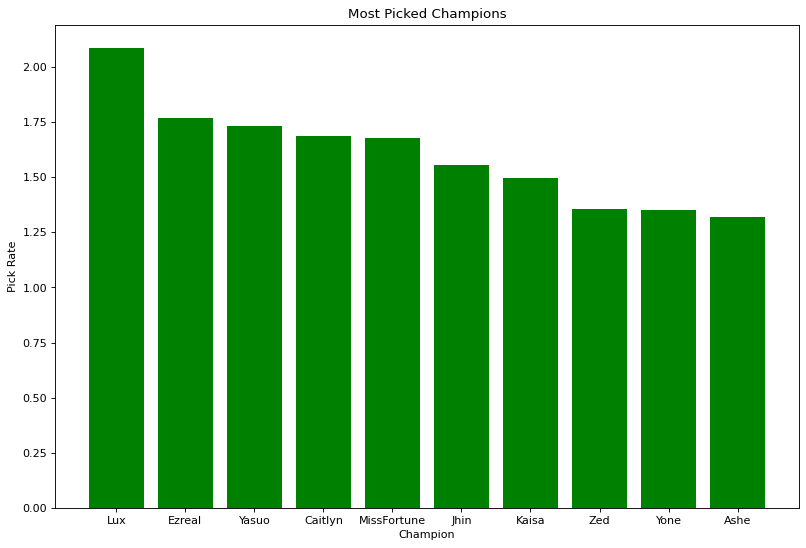

In [ ]:
figure(figsize=(12, 8), dpi=80)
plt.bar(*zip(*top_pick_rate),color='green')

plt.title('Most Picked Champions')
plt.xlabel('Champion')
plt.ylabel('Pick Rate')
plt.show()

### Champion win rate:

In [ ]:
# filtering the participants to the winner only
winner_participants = participants.filter(lambda x: x['win']== True)

# Get all champions
winner_champions = winner_participants.map(lambda x: x['championName'])

# Get the count of each champion
winner_champions_pick_count = winner_champions.map(lambda champion: (champion, 1)).reduceByKey(add)
print(winner_champions_pick_count.take(10))

[('Leblanc', 1750), ('Lulu', 2384), ('Ziggs', 1527), ('Chogath', 1909), ('Vi', 1799), ('Khazix', 1919), ('LeeSin', 3535), ('Poppy', 1068), ('Qiyana', 971), ('Orianna', 975)]


In [ ]:
total_win = winner_champions_pick_count.map(lambda x: x[1]).reduce(add)
print(total_win)
champion_win_rate = winner_champions_pick_count.map(lambda x:(x[0], x[1]*100/total_win)).sortBy(lambda x: x[1], ascending = False)
top_win_rate= champion_win_rate.take(10)
print(top_win_rate)

363484
[('Lux', 2.1233396793256376), ('MissFortune', 1.729649723234035), ('Yasuo', 1.714518383202562), ('Ezreal', 1.6955354293448954), ('Caitlyn', 1.6658229798285482), ('Jhin', 1.5794367840125012), ('Kaisa', 1.4812206314445753), ('Zed', 1.3428376489749205), ('Yone', 1.3389860351487273), ('Ashe', 1.3252302714837516)]


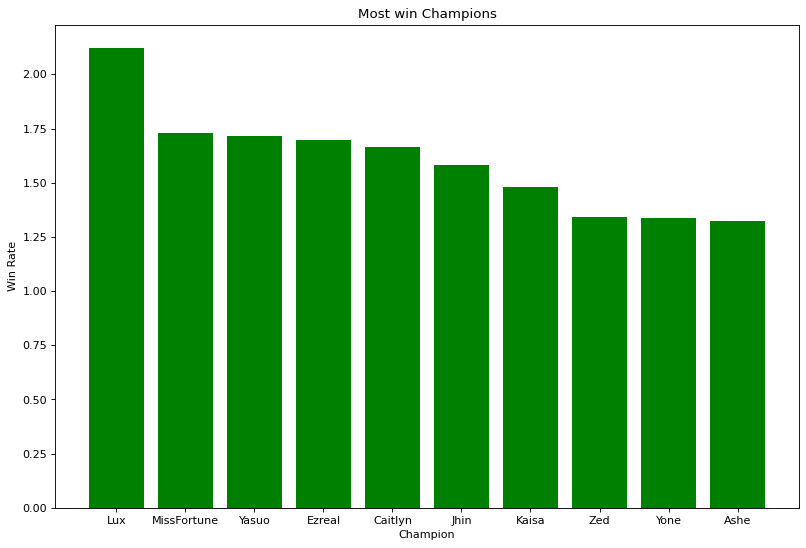

In [ ]:
figure(figsize=(12, 8), dpi=80)
plt.bar(*zip(*top_win_rate),color='green')
plt.title('Most win Champions')
plt.xlabel('Champion')
plt.ylabel('Win Rate')
plt.show()

### Champion ban rate:

In [ ]:
champions_name_id = participants.map(lambda x:(x['championId'],x['championName']))

In [ ]:
champions_name_id_dict = dict(champions_name_id.collect())

In [ ]:
def get_champ_name(x):
  if x[0] == ' ':
    return x[1]
  else:
    return x[0]

In [ ]:
# Get a list of the participants in the given matchs
teams = data_rdd.map(lambda x:x['info']['teams']).flatMap(lambda x:x)
banned_teams = teams.map(lambda x:x['bans']).flatMap(lambda x:x)

# Get all champions
banned_champions = banned_teams.map(lambda x: x['championId'])
banned_champions = banned_champions.filter(lambda x: x in champions_name_id_dict.keys())



In [ ]:
champions_ban_count = banned_champions.map(lambda champion: (champions_name_id_dict[champion], 1)).reduceByKey(lambda a, b: a + b)

champions_ban_count.take(10)

[('Lulu', 3804),
 ('LeeSin', 4504),
 ('Leblanc', 3753),
 ('Khazix', 1278),
 ('Qiyana', 480),
 ('Vi', 679),
 ('Chogath', 914),
 ('Shen', 435),
 ('Ziggs', 276),
 ('Poppy', 569)]

In [ ]:
count = champions_ban_count.take(10)

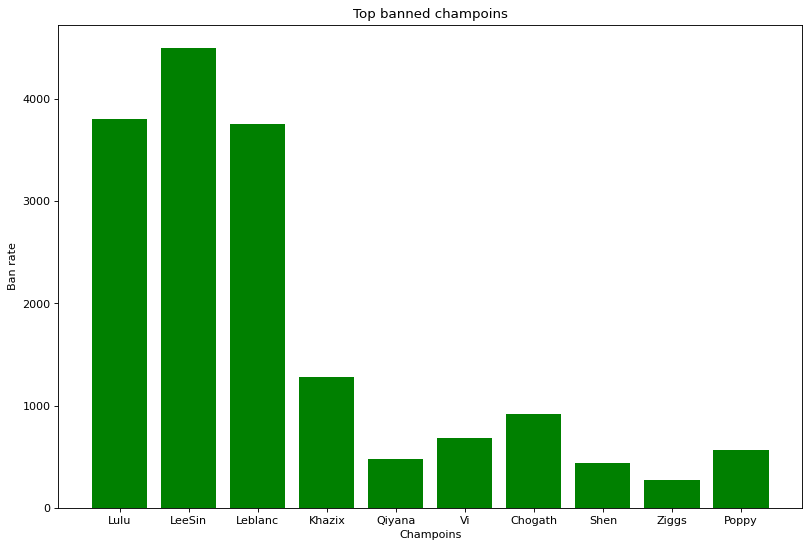

In [ ]:

figure(figsize=(12, 8), dpi=80)
plt.bar(*zip(*count),color='green')
plt.title('Top banned champoins')
plt.xlabel('Champoins')
plt.ylabel('Ban rate')
plt.show()


### Champion ban rate:

In [ ]:
champions_name_id = participants.map(lambda x:(x['championId'],x['championName']))

In [ ]:
def get_champ_name(x):
  if x[0] == ' ':
    return x[1]
  else:
    return x[0]

In [ ]:
# Get a list of the participants in the given matchs
teams = data_rdd.map(lambda x:x['info']['teams']).flatMap(lambda x:x)
banned_teams = teams.map(lambda x:x['bans']).flatMap(lambda x:x)

# Get all champions
banned_champions = banned_teams.map(lambda x: (x['championId'],' '))
banned_champions = banned_champions.join(champions_name_id).mapValues(get_champ_name).map(lambda x:x[1])
champions_ban_count = banned_champions.map(lambda champion: (champion, 1)).reduceByKey(lambda a, b: a + b)

In [ ]:
count = champions_ban_count.take(10)

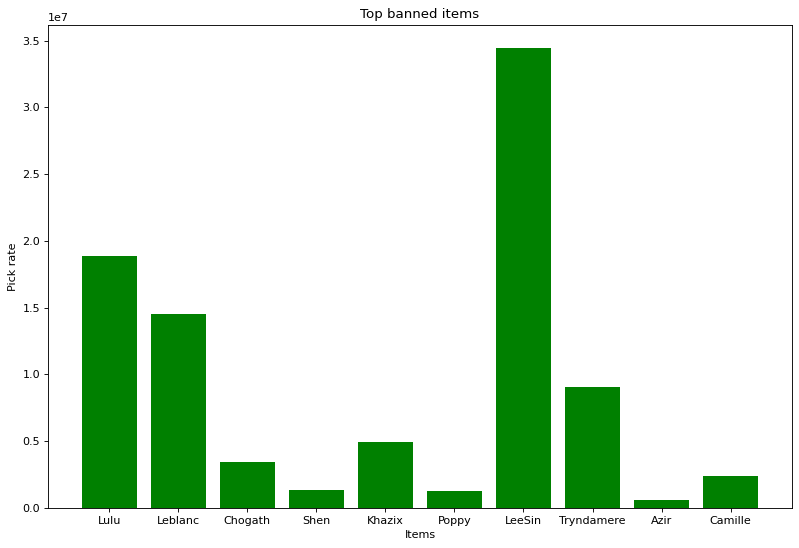

In [ ]:

figure(figsize=(12, 8), dpi=80)
plt.bar(*zip(*count),color='green')
plt.title('Top banned items')
plt.xlabel('Items')
plt.ylabel('Pick rate')
plt.show()


### Champion ban rate:

In [ ]:
champions_name_id = participants.map(lambda x:(x['championId'],x['championName']))

In [ ]:
def get_champ_name(a,b):
  if a != ' ':
    return (a)
  print(a)


In [ ]:
# Get a list of the participants in the given matchs
teams = data_rdd.map(lambda x:x['info']['teams']).flatMap(lambda x:x)
banned_teams = teams.map(lambda x:x['bans']).flatMap(lambda x:x)

# Get all champions
banned_champions = banned_teams.map(lambda x: (x['championId'],' '))
#print(banned_champions.take(2))
banned_champions = banned_champions.union(champions_name_id).reduceByKey(get_champ_name)
banned_champions.take(2)

[(110, None), (22, None)]

In [ ]:

# Get the count of each champion
banned_champions_pick_count = banned_champions.map(lambda champion: (champion, 1)).reduceByKey(add)
print(banned_champions_pick_count.take(10))

total_bans = banned_champions_pick_count.map(lambda x: x[1]).reduce(add)
print(total_bans)

champion_ban_rate = banned_champions_pick_count.map(lambda x:(x[0], x[1]*100/total_bans)).sortBy(lambda x: x[1], ascending = False)
top_ban_rate = champion_ban_rate.take(10)
print(top_ban_rate)

[56, 120]
[(11, 15976), (99, 7814), (517, 5645), (110, 1178), (22, 1766), (33, 6029), (77, 6957), (55, 5062), (121, 1278), (44, 486)]
509412
[(238, 5.542664876367263), (25, 4.199155104316349), (11, 3.1361648331802154), (157, 3.0515574819595925), (-1, 3.0225043775961304), (53, 2.88410952235126), (122, 2.8034282663148886), (35, 2.798913256852999), (360, 2.789294323651583), (200, 1.997597229747238)]


## Requirment II: Champion Synergies or duos

In [ ]:
def get_duos_win_team(match):
  duos = []
  participants = []
  champions_names = []

  for i in range(len(match['info']['participants'])):
    if  match['info']['participants'][i]['win']==True:
      participants.append( match['info']['participants'][i])

  for i in range(len(participants)):
    for j in range(i+1, len(participants)):
      champions_names.append((participants[i]['championName'],participants[j]['championName']))

  for i in champions_names:
      duos.append((i, 1))
  return duos

In [ ]:

# Get combination between Wining champoins and the items they used
win_champoins_name_duo = data_rdd.map(get_duos_win_team)

# Get count all Wining champoins and corresponding items pairs
win_champoins_name_duo_count = win_champoins_name_duo.flatMap(lambda x: x).reduceByKey(add)

total_wins = win_champoins_name_duo_count.map(lambda x:x[1]).reduce(add)
print(total_wins)

win_champoins_name_duo_rate = win_champoins_name_duo_count.map(lambda x:(x[0], x[1]*100/total_wins)).sortBy(lambda x: x[1], ascending = False)
top_win_champ_duo = win_champoins_name_duo_rate.take(10)
top_win_champ_duo

726916


[(('Caitlyn', 'Lux'), 0.08597967302962103),
 (('Ezreal', 'Lux'), 0.07511184235867693),
 (('Yasuo', 'Lux'), 0.06658265879413852),
 (('Lucian', 'Nami'), 0.06534455150251198),
 (('Caitlyn', 'Morgana'), 0.0627307694424115),
 (('MissFortune', 'Lux'), 0.06163022962763235),
 (('Yone', 'Lux'), 0.06080482476654799),
 (('Mordekaiser', 'Lux'), 0.0606672572897006),
 (('Jhin', 'Lux'), 0.05915401504437927),
 (('Warwick', 'Lux'), 0.0584661776601423)]

In [ ]:
X = []
height  = []
for champ, count in top_win_champ_duo:
    duo_1 = champ[0]
    duo_2 = champ[1]
    X.append(duo_1+"--"+duo_2)
    height.append(count *100)

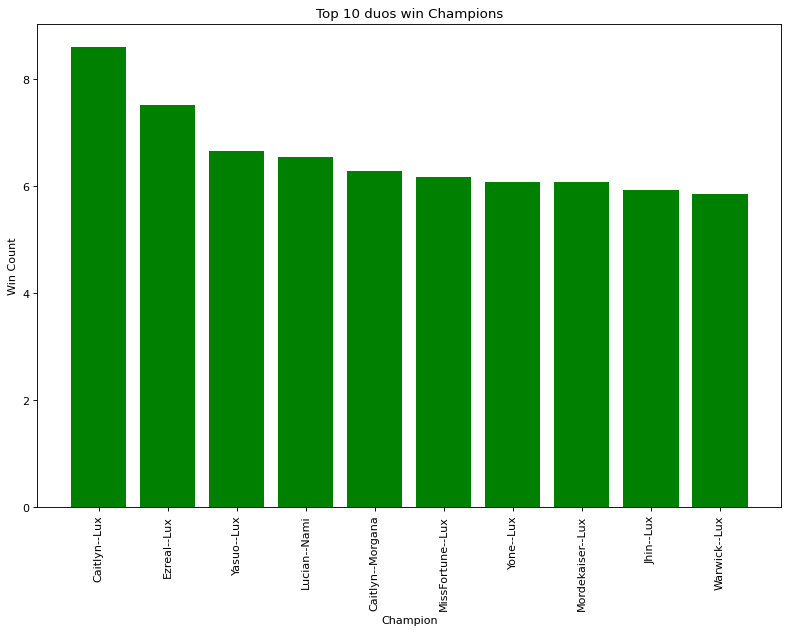

In [ ]:
figure(figsize=(12, 8), dpi=80)
plt.bar(X,height,color='green')
plt.title('Top 10 duos win Champions')
plt.xlabel('Champion')
plt.ylabel('Win Count')
plt.xticks( rotation = 90 )
plt.show()

## Requirment III: Item win, pick rates

### Item pick rate:

In [ ]:
# Get a list of the participants in the given matchs
items = participants.map(lambda x:(x['item0']))
for i in range(1,7):
  item_no = 'item'+str(i)
  #print(item_no)
  item = participants.map(lambda x:(x[item_no]))
  items = items.union(item)

counted_items =items.map(lambda x:(x,1)).reduceByKey(add)


In [ ]:
counted_items.take(10)

[(3157, 76627),
 (0, 564603),
 (3850, 2187),
 (3003, 1460),
 (7007, 621),
 (1001, 20918),
 (2003, 21574),
 (3158, 88011),
 (3851, 3838),
 (4005, 6206)]

In [ ]:
# pick rate
total = counted_items.map(lambda x:x[1]).reduce(add)
print(total)
pick_rate = counted_items.map(lambda x:(x[0], x[1]*100/total)).sortBy(lambda x: x[1], ascending = False)
top_picked_items = pick_rate.take(10)
top_picked_items

5090309


[(0, 11.091723508337116),
 (3340, 6.341913624497059),
 (3364, 3.414252455008134),
 (3020, 3.194305100142251),
 (3006, 2.862635647462659),
 (3047, 2.4791422288902303),
 (2052, 2.4648994785974683),
 (3111, 1.8549561529565297),
 (3158, 1.7289913048500591),
 (3157, 1.5053506574944664)]

In [ ]:
pick_rate.collect()

In [ ]:
top10 = pick_rate.join(item_name_id).map(lambda x: (x[1][1], x[1][0])).sortBy(lambda x: x[1], ascending = False).take(10)
top10


[('Warding Totem (Trinket)', 6.341913624497059),
 ('Oracle Alteration', 3.414252455008134),
 ("Sorcerer's Shoes", 3.194305100142251),
 ("Berserker's Greaves", 2.862635647462659),
 ('Ninja Tabi', 2.4791422288902303),
 ('Poro-Snax', 2.4648994785974683),
 ("Mercury's Treads", 1.8549561529565297),
 ('Ionian Boots of Lucidity', 1.7289913048500591),
 ("Zhonya's Hourglass", 1.5053506574944664),
 ('Farsight Alteration', 1.30911502621943)]

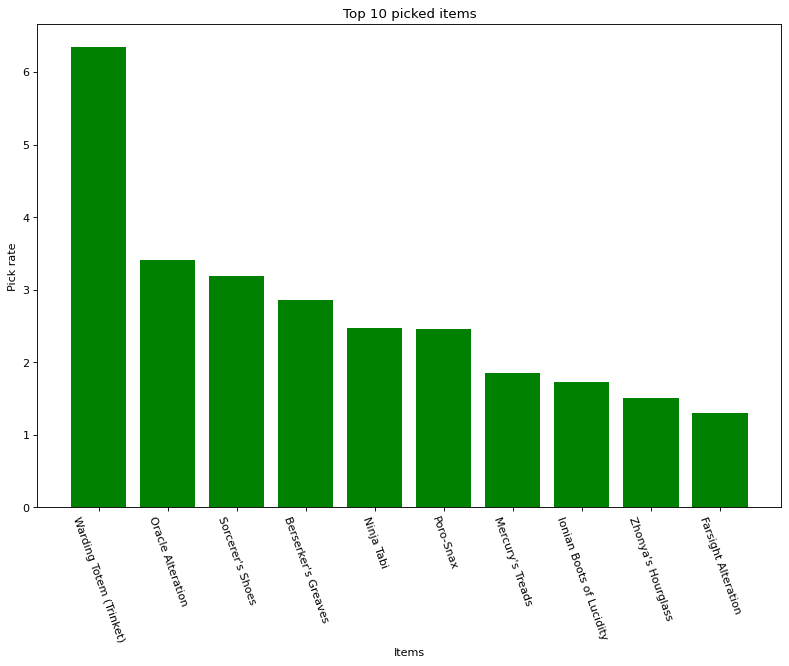

In [ ]:

figure(figsize=(12, 8), dpi=80)
plt.bar(*zip(*top10),color='green')
plt.title('Top 10 picked items')
plt.xlabel('Items')
plt.ylabel('Pick rate')
plt.xticks( rotation = -70 )
plt.show()

### Item win rate:

In [ ]:
# filtering the participants to the winner only
winner_participants = participants.filter(lambda x: x['win']== True)

In [ ]:

# Get a list of the participants in the given matchs
win_items = winner_participants.map(lambda x:(x['item0']))
for i in range(1,7):
  item_no = 'item'+str(i)
  # print(item_no)
  item = winner_participants.map(lambda x:(x[item_no]))
  win_items = win_items.union(item)


win_counted_items =win_items.map(lambda x:(x,1)).reduceByKey(add)
win_counted_items.take(10)

win_total_items = win_counted_items.map(lambda x:x[1]).reduce(add)


In [ ]:
win_rate = win_counted_items.map(lambda x:(x[0], x[1]*100/win_total_items)).sortBy(lambda x: x[1], ascending = False)
top_win_items= win_rate.take(10)
top_win_items


[(0, 9.993680209150492),
 (3340, 6.163761187366078),
 (3364, 3.531418950254442),
 (3020, 3.28424752828578),
 (3006, 2.879828076535497),
 (3047, 2.485863005170595),
 (2052, 2.478081173154409),
 (3111, 1.8832819522808628),
 (3158, 1.7530738236463936),
 (3157, 1.5802621298323998)]

In [ ]:
win_counted_items.collect()

In [ ]:
top10win= win_counted_items.join(item_name_id).map(lambda x: (x[1][1], x[1][0])).sortBy(lambda x: x[1], ascending = False).take(10)

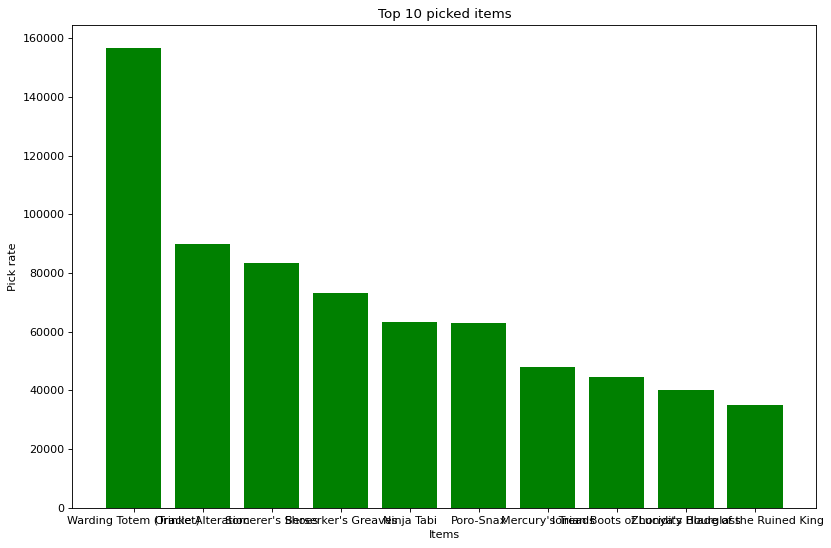

In [ ]:
figure(figsize=(12, 8), dpi=80)
plt.bar(*zip(*top10win),color='green')
plt.title('Top 10 picked items')
plt.xlabel('Items')
plt.ylabel('Pick rate')
plt.show()

## Requirment IV: Item Synergies (item with champion, item with class)

### Item with champion:

In [ ]:
def get_duos_items_champion(match):
  duos = []
  participants = []
  champions_items = []

  for i in range(len(match['info']['participants'])):
    if  match['info']['participants'][i]['win']==True:
      participants.append( match['info']['participants'][i])

  for participant in participants:
    for i in range(6):
      if participant['item'+str(i)] in item_name_id_dict.keys():
        champions_items.append((item_name_id_dict[participant['item'+str(i)]], participant['championName']))

  for i in champions_items:
      duos.append((i, 1))
  return duos

In [ ]:

# Get combination between Wining champoins and the items they used
champoin_item = data_rdd.map(get_duos_items_champion)

# Get count all Wining champoins and corresponding items pairs
champoin_item_count = champoin_item.flatMap(lambda x: x).reduceByKey(add)
champoin_item_count.take(10)


[(('Blasting Wand', 'Leblanc'), 114),
 (('Zeal', 'Kaisa'), 292),
 (("Mejai's Soulstealer", 'Veigar'), 84),
 (('Rapid Firecannon', 'Twitch'), 23),
 (('Boots of Speed', 'Twitch'), 46),
 (('Refillable Potion', 'Udyr'), 234),
 (("Dead Man's Plate", 'Udyr'), 330),
 (("Doran's Blade", 'Irelia'), 792),
 (('Tiamat', 'Kayn'), 59),
 (('Blasting Wand', 'Zoe'), 83)]

In [ ]:
total_wins = champoin_item_count.map(lambda x:x[1]).reduce(add)
print(total_wins)

win_champoins_item_duo_rate = champoin_item_count.map(lambda x:(x[0], x[1]*100/total_wins)).sortBy(lambda x: x[1], ascending = False)
top_champ_items= win_champoins_item_duo_rate.take(10)
top_champ_items

1352494


[(("Sorcerer's Shoes", 'Lux'), 0.47002056940733195),
 (("Berserker's Greaves", 'Yasuo'), 0.4118317715272674),
 (("Berserker's Greaves", 'Caitlyn'), 0.4025156488679432),
 (('Muramana', 'Ezreal'), 0.34617528802345887),
 (('Ionian Boots of Lucidity', 'Ezreal'), 0.34033422699102545),
 (("Berserker's Greaves", 'Kaisa'), 0.32325466878226444),
 (('Boots of Swiftness', 'Jhin'), 0.32318073130084124),
 (("Berserker's Greaves", 'Yone'), 0.3225152939680324),
 (("Berserker's Greaves", 'MissFortune'), 0.30122129931814856),
 (("Berserker's Greaves", 'Jinx'), 0.2910179268817459)]

In [ ]:
X = []
height  = []
for pair, count in top_champ_items:
    duo_1 = pair[0]
    duo_2 = pair[1]
    X.append(duo_1+"--"+duo_2)
    height.append(count*100)

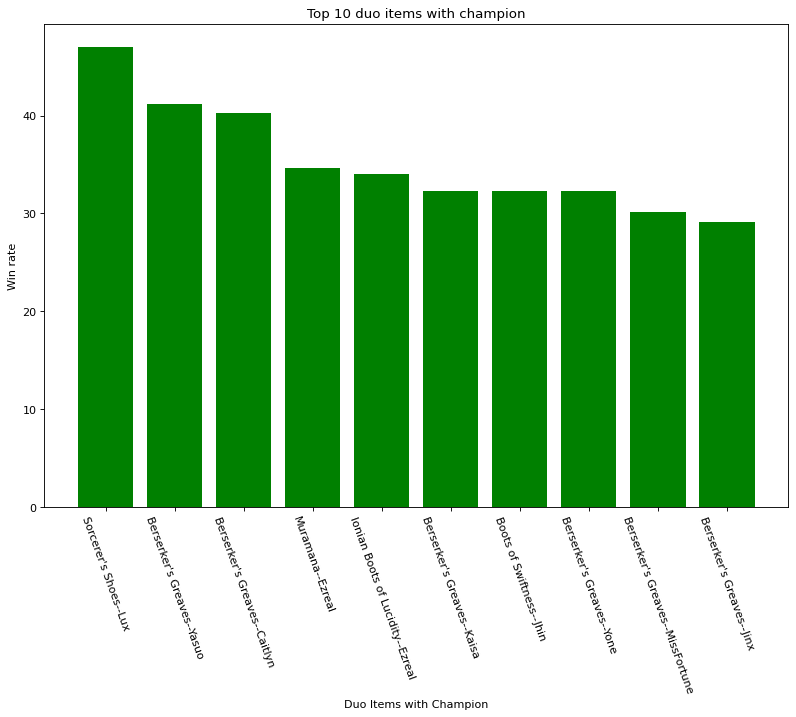

In [ ]:
figure(figsize=(12, 8), dpi=80)
plt.bar(X,height,color='green')
plt.title('Top 10 duo items with champion')
plt.xlabel('Duo Items with Champion')
plt.ylabel('Win rate')
plt.xticks( rotation = -70 )
plt.show()

### Item with class:

In [ ]:
def get_duos_items_class(match):
  duos = []
  participants = []
  class_items = []

  for i in range(len(match['info']['participants'])):
    if  match['info']['participants'][i]['win']==True:
      participants.append( match['info']['participants'][i])

  for participant in participants:
    for i in range(6):
      if participant['item'+str(i)] in item_name_id_dict.keys():
        if participant['role'] != 'NONE':
          class_items.append((item_name_id_dict[participant['item'+str(i)]], participant['role']))

  for i in class_items:
      duos.append((i, 1))
  return duos

In [ ]:

# Get combination between Wining champoins and the items they used
class_item = data_rdd.map(get_duos_items_class)

# Get count all Wining champoins and corresponding items pairs
class_item_count = class_item.flatMap(lambda x: x).reduceByKey(add)
class_item_count.take(10)

[(("Zhonya's Hourglass", 'SUPPORT'), 15688),
 (('Chain Vest', 'DUO'), 618),
 (('Null-Magic Mantle', 'SUPPORT'), 2578),
 (('Phantom Dancer', 'DUO'), 1641),
 (('Ionian Boots of Lucidity', 'SUPPORT'), 21650),
 (('Blade of the Ruined King', 'CARRY'), 5242),
 (('Titanic Hydra', 'SOLO'), 2843),
 (("Youmuu's Ghostblade", 'SOLO'), 2352),
 (('Control Ward', 'SUPPORT'), 10259),
 (('Tear of the Goddess', 'SUPPORT'), 7287)]

In [ ]:
total_wins = class_item_count.map(lambda x:x[1]).reduce(add)
print(total_wins)

class_item_count_duo_rate = class_item_count.map(lambda x:(x[0], x[1]*100/total_wins)).sortBy(lambda x: x[1], ascending = False)
top_class_items= class_item_count_duo_rate.take(10)
top_class_items

1133827


[(("Sorcerer's Shoes", 'SUPPORT'), 3.534225238947388),
 (("Berserker's Greaves", 'CARRY'), 2.4230327907167495),
 (("Sorcerer's Shoes", 'SOLO'), 2.1572956015335674),
 (('Ionian Boots of Lucidity', 'SUPPORT'), 1.909462378299335),
 (('Ninja Tabi', 'SOLO'), 1.8492239115843951),
 (("Mercury's Treads", 'SUPPORT'), 1.8322901112779992),
 (('Ninja Tabi', 'SUPPORT'), 1.419969713192577),
 (("Berserker's Greaves", 'SUPPORT'), 1.3869840813457432),
 (("Zhonya's Hourglass", 'SUPPORT'), 1.3836326000351025),
 (("Zhonya's Hourglass", 'SOLO'), 1.2518664664009589)]

In [ ]:
X = []
height  = []
for pair, count in top_class_items:
    duo_1 = pair[0]
    duo_2 = pair[1]
    X.append(duo_1+"--"+duo_2)
    height.append(count*100)

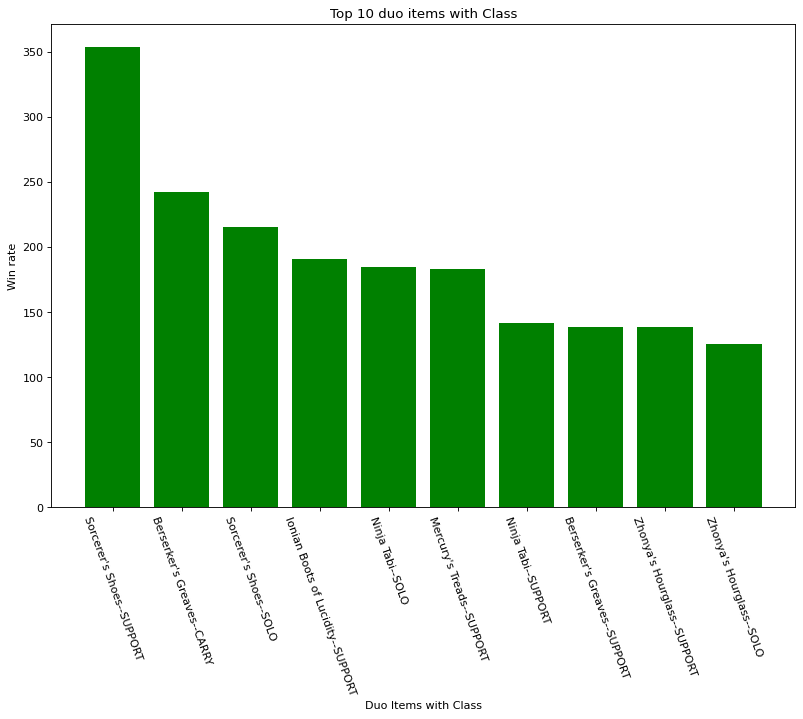

In [ ]:
figure(figsize=(12, 8), dpi=80)
plt.bar(X,height,color='green')
plt.title('Top 10 duo items with Class')
plt.xlabel('Duo Items with Class')
plt.ylabel('Win rate')
plt.xticks( rotation = -70 )
plt.show()

## Requirment V: Item Suggestion
Top 5 Champoin-Item suggestion for Three different classes are given below.

In [ ]:

def get_winner_champoin_item_pair(match):

  pairs = []
  participants = []
  champions_items_pairs = []

  for i in range(len(match['info']['participants'])):
    if  match['info']['participants'][i]['win']==True:
      participants.append( match['info']['participants'][i])

  for participant in participants:
    for i in range(6):
      if participant['item'+str(i)] in item_name_id_dict.keys():
        champions_items_pairs.append((participant['championName'],participant['role'],item_name_id_dict[participant['item'+str(i)]]))


  for i in champions_items_pairs:
      pairs.append((i, 1))

  return pairs

In [ ]:
def most_count(a,b):
  if a[1]> b[1]:
   return  a
  else:
   return b

In [ ]:

# Get combination between Wining champoins and the items they used
win_champoin_item_pair = data_rdd.map(get_winner_champoin_item_pair)

# Get count all Wining champoins and corresponding items pairs
win_champoin_item_pair_count = win_champoin_item_pair.flatMap(lambda x: x).reduceByKey(lambda a, b: a + b)

# For each champoin, choose the most used item when a win was achieved
final = win_champoin_item_pair_count.map(lambda x: ((x[0][0],x[0][1]),(x[0][2],x[1]))).reduceByKey(most_count).sortBy(lambda x: x[1][1], ascending = False)



In [ ]:
support_role = final.filter(lambda x: x[0][1]=='SUPPORT').take(5)
carry_role = final.filter(lambda x: x[0][1]=='CARRY').take(5)
solo_role = final.filter(lambda x: x[0][1]=='SOLO').take(5)

In [ ]:
def plot(plot_final):
  X = []
  height  = []
  role = ''
  for pair, count in plot_final:
      duo_1 = pair[0]
      duo_2 = count[0]
      X.append(duo_1+"--"+duo_2)
      height.append(count[1])
      role = pair[1]

  figure(figsize=(12, 8), dpi=80)
  plt.bar(X,height,color='green')
  plt.title('Top 10 item suggetions for '+ role + ' Class')
  plt.xlabel('Champoin-Item  suggestion')
  plt.ylabel('Win count')
  plt.xticks( rotation = -70 )
  plt.show()

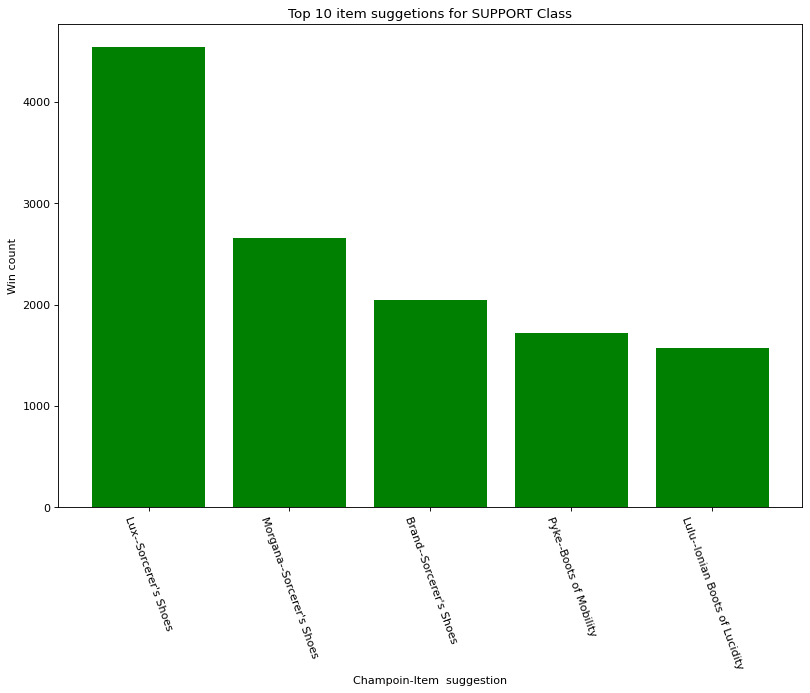

In [ ]:
plot(support_role)

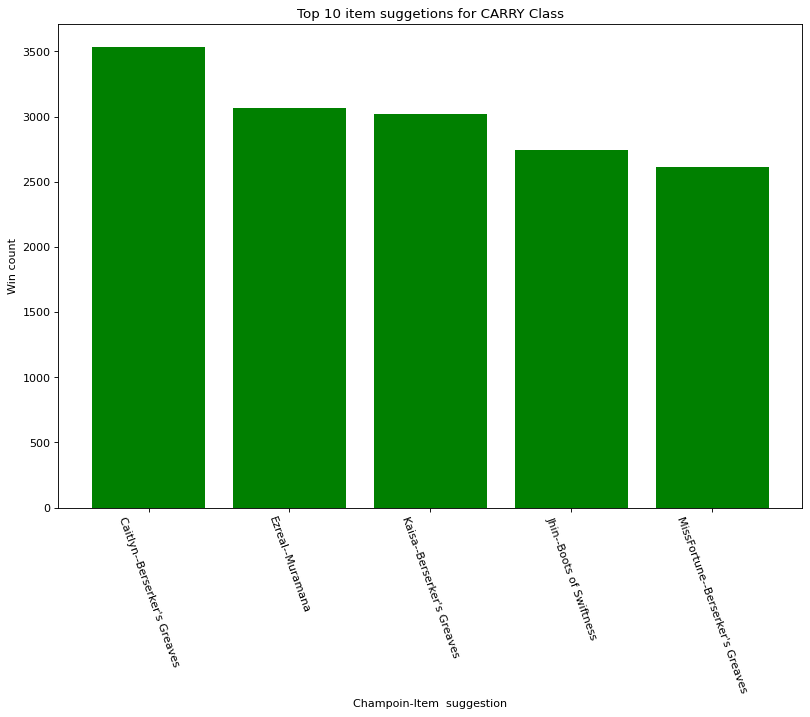

In [ ]:
plot(carry_role)

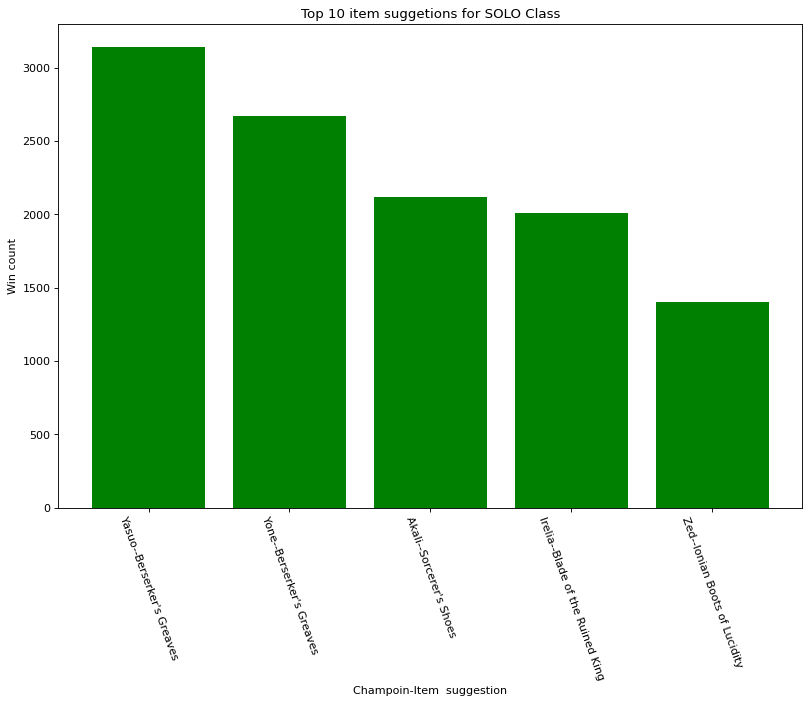

In [ ]:
plot(solo_role)

## Extra Requirment:

- Champion double kills rate: this should describe the number of double kills done by each of the champions.
- Champion deaths: get the total deaths per each champion.
- Spell pick rate:  get the used spells for each participant in each match and then count over these spells to get the rate for the picked spell.


### Task 1 (Champion double kills rate) :
- This should describe the number of double kills done by each of the champions

In [ ]:
# Get the doubleKills of each participant
champion_doubleKills = participants.map(lambda x: (x['championName'] , x['doubleKills']))
champions_doubleKills_count = champion_doubleKills.reduceByKey(lambda a, b: a + b)
print(champions_doubleKills_count.take(2))

[('Leblanc', 3209), ('Vi', 2838)]


In [ ]:
champions_doubleKills_sorted = champions_doubleKills_count.sortBy(lambda x: x[1], ascending = False)
champ_kills = champions_doubleKills_sorted.take(10)

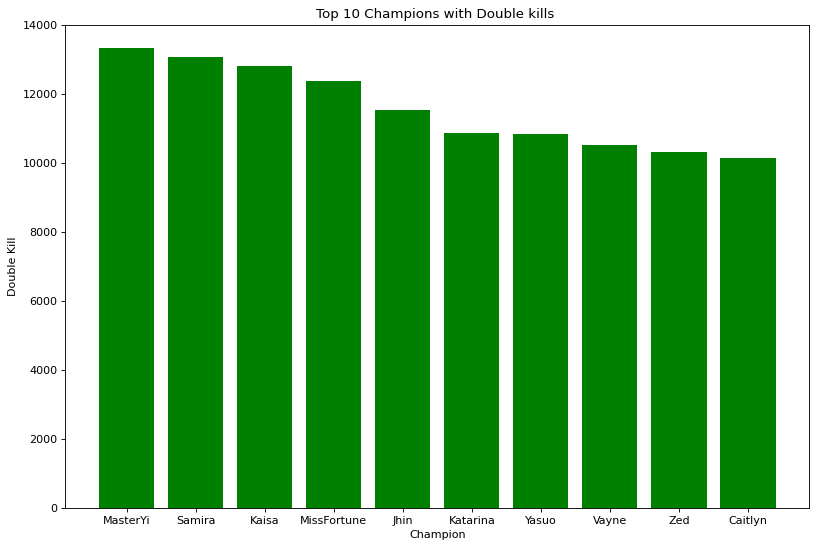

In [ ]:
figure(figsize=(12, 8), dpi=80)
plt.bar(*zip(*champ_kills),color='green')

plt.title('Top 10 Champions with Double kills ')
plt.xlabel('Champion')
plt.ylabel('Double Kill')
plt.show()

### Task 2 (Champion deaths):
- get the total deaths per each champion

In [ ]:
# Get the doubleKills of each participant
champion_deaths = participants.map(lambda x: (x['championName'] , x['deaths']))
champions_deaths_count = champion_deaths.reduceByKey(lambda a, b: a + b)
print(champions_deaths_count.take(2))

[('Leblanc', 25989), ('Vi', 25186)]


In [ ]:
champions_deaths_sorted = champions_deaths_count.sortBy(lambda x: x[1], ascending = False)
champ_death = champions_deaths_sorted.take(10)

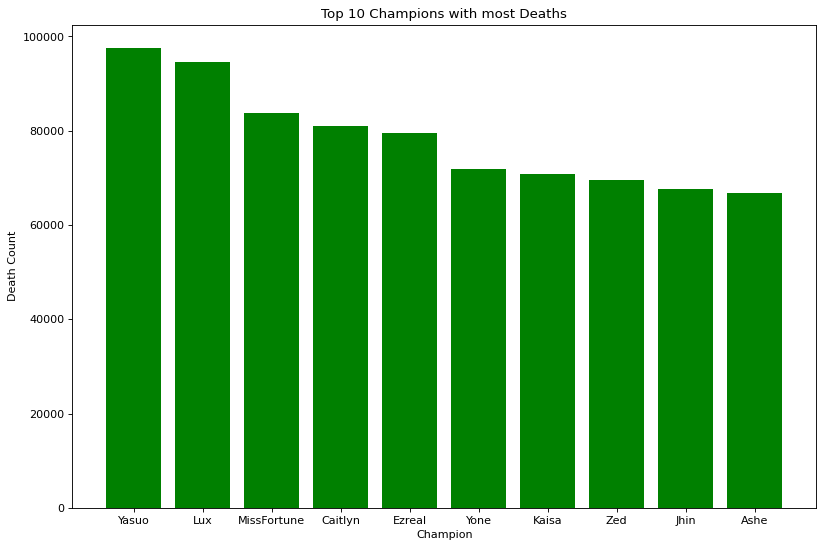

In [ ]:
figure(figsize=(12, 8), dpi=80)
plt.bar(*zip(*champ_death),color='green')

plt.title('Top 10 Champions with most Deaths')
plt.xlabel('Champion')
plt.ylabel('Death Count')
plt.show()

### Task 3 (Spell pick rate) :
- Get the used spells for each participant in each match and then count over these spells to get the rate for the picked spell.


In [ ]:
# Get all items bought by all participants
Spells = participants.map(lambda x: [x['spell1Casts'], x['spell2Casts'], x['spell3Casts'], x['spell4Casts']]).flatMap(lambda x:x)

# Count these items
Spells_pick_count = Spells.map(lambda item: (item, 1)).reduceByKey(lambda a, b: a + b)

# Get the rate of picking each item
Spells_pick_count_rate = Spells_pick_count.map(lambda x: (x[0], str(x[1]  * 100/ num_participants) + '%'))
print(Spells_pick_count.take(20))
print(Spells_pick_count_rate.take(20))

[(44, 24834), (187, 1318), (121, 4564), (22, 32464), (11, 52913), (33, 29162), (99, 7730), (297, 233), (0, 92017), (66, 15952), (55, 20184), (363, 87), (132, 3661), (231, 700), (110, 6148), (77, 12680), (308, 241), (374, 83), (154, 2376), (88, 9857)]
[(44, '3.410139514445787%'), (187, '0.18098429089311216%'), (121, '0.6267164670987586%'), (22, '4.457871031528068%'), (11, '7.26587388772932%'), (33, '4.004449082719982%'), (99, '1.0614632538723499%'), (297, '0.031994946720861256%'), (0, '12.635532242117984%'), (66, '2.19048665275184%'), (55, '2.771613753707569%'), (363, '0.01194661100736021%'), (132, '0.5027188838844338%'), (231, '0.09612215753048446%'), (110, '0.8442271778534549%'), (77, '1.7411842249807756%'), (308, '0.033093485664066793%'), (374, '0.011397341535757442%'), (154, '0.3262660661320444%'), (88, '1.3535372953971219%')]


### Task 5:

In [ ]:
def get_lane_champion(match):
  duos = []
  participants = []
  champions_lane = []

  for i in range(len(match['info']['participants'])):
    if  match['info']['participants'][i]['win']==True:
      participants.append( match['info']['participants'][i])

  for participant in participants:
    champions_lane.append(( participant['lane'] , participant['championName']))

  for i in champions_lane:
      duos.append((i, 1))
  return duos

In [ ]:
def most_count(a,b):

  if a[1]> b[1]:
   return  a
  else:
   return b

In [ ]:

# Get combination between Wining champoins and the items they used
champoin_lane = data_rdd.map(get_lane_champion)

# Get count all Wining champoins and corresponding items pairs
champoin_lane_count = champoin_lane.flatMap(lambda x: x).reduceByKey(add).map(lambda x: (x[0][0],(x[0][1],x[1])))
most_champoin_lane = champoin_lane_count.reduceByKey(most_count)


In [ ]:
# top 5
mid_lane= champoin_lane_count.filter(lambda x: x[0]=='MIDDLE').sortBy(lambda x: x[1][1], ascending = False).take(5)
top_lane = champoin_lane_count.filter(lambda x: x[0]=='TOP').sortBy(lambda x: x[1][1], ascending = False).take(5)
bottom_lane = champoin_lane_count.filter(lambda x: x[0]=='BOTTOM').sortBy(lambda x: x[1][1], ascending = False).take(5)
jungle_lane = champoin_lane_count.filter(lambda x: x[0]=='JUNGLE').sortBy(lambda x: x[1][1], ascending = False).take(5)
none_lane = champoin_lane_count.filter(lambda x: x[0]=='NONE').sortBy(lambda x: x[1][1], ascending = False).take(5)

In [ ]:
mid_lane

[('MIDDLE', ('Yasuo', 3403)),
 ('MIDDLE', ('Zed', 2641)),
 ('MIDDLE', ('Yone', 2449)),
 ('MIDDLE', ('Akali', 2182)),
 ('MIDDLE', ('Katarina', 1927))]

In [ ]:
Most_lane = most_champoin_lane.take(10)

In [ ]:
Most_lane

[('MIDDLE', ('Yasuo', 3403)),
 ('BOTTOM', ('Caitlyn', 3931)),
 ('NONE', ('Lux', 1648)),
 ('TOP', ('Mordekaiser', 2099)),
 ('JUNGLE', ('MasterYi', 2753))]

In [ ]:
def lane_plot(Most_lane):
  X = []
  height  = []
  name = ' '
  for pair, count in Most_lane:
    name = pair
    duo_2 = count[0]
    X.append(duo_2)
    height.append(count[1])
  figure(figsize=(12, 8), dpi=80)
  plt.bar(X,height,color='green')
  plt.title('Top champion in '+ name)
  plt.xlabel('Lane-Champion ')
  plt.ylabel('Picked count')
  plt.xticks( rotation = -70 )
  plt.show()


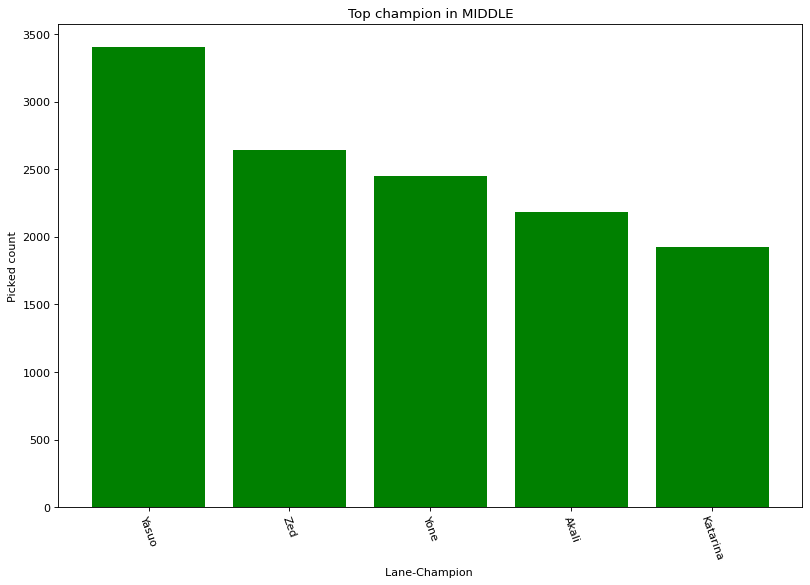

In [ ]:
# plot Middle:
lane_plot(mid_lane)

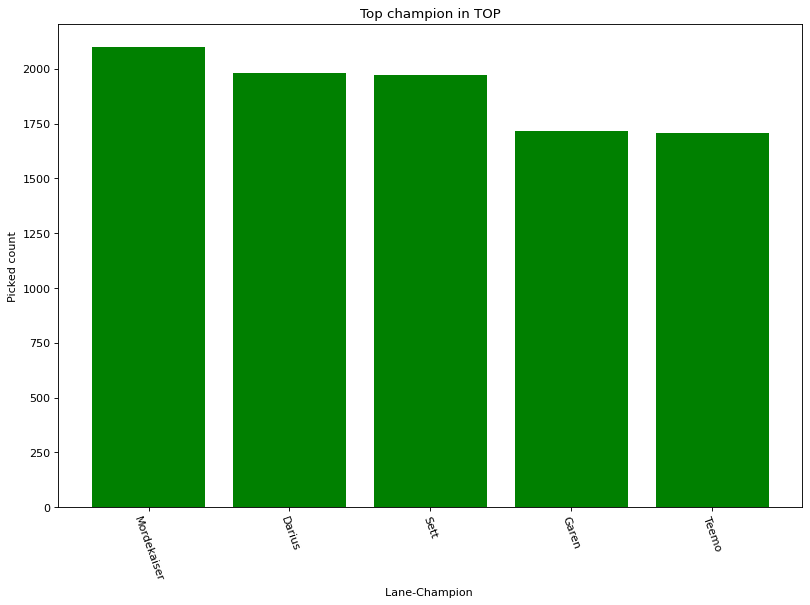

In [ ]:
# plot top:
lane_plot(top_lane)

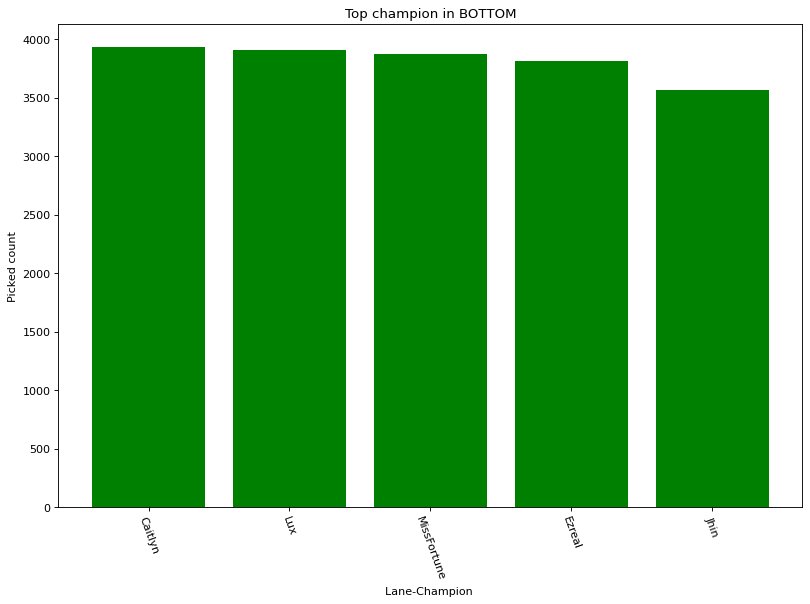

In [ ]:
# plot bottom:
lane_plot(bottom_lane)

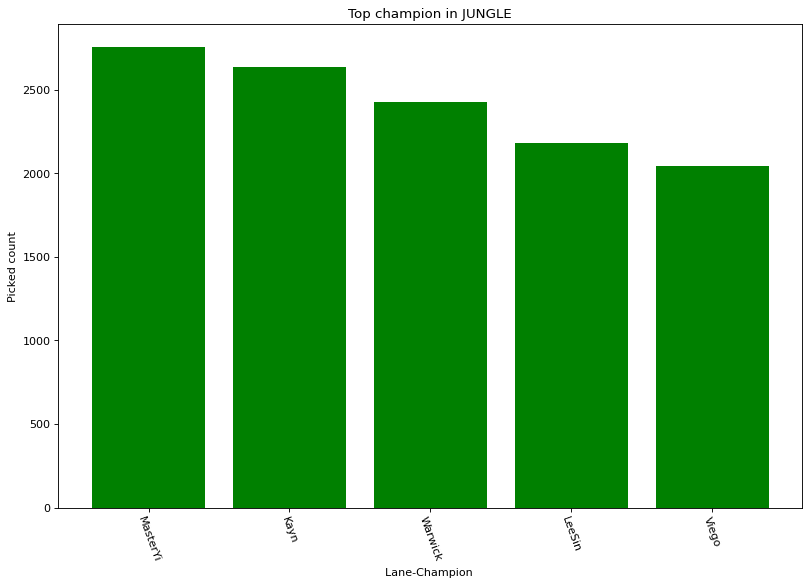

In [ ]:
# plot jungle:
lane_plot(jungle_lane)

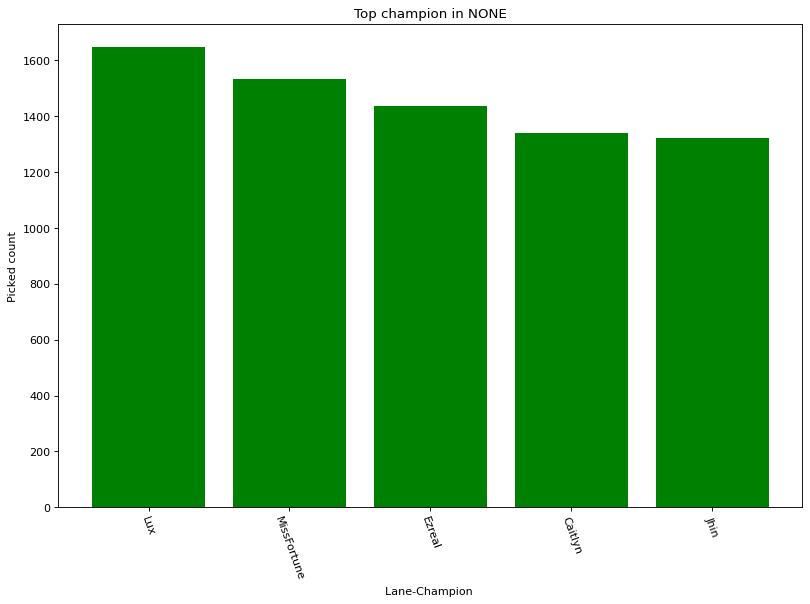

In [ ]:
# plot None:
lane_plot(none_lane)

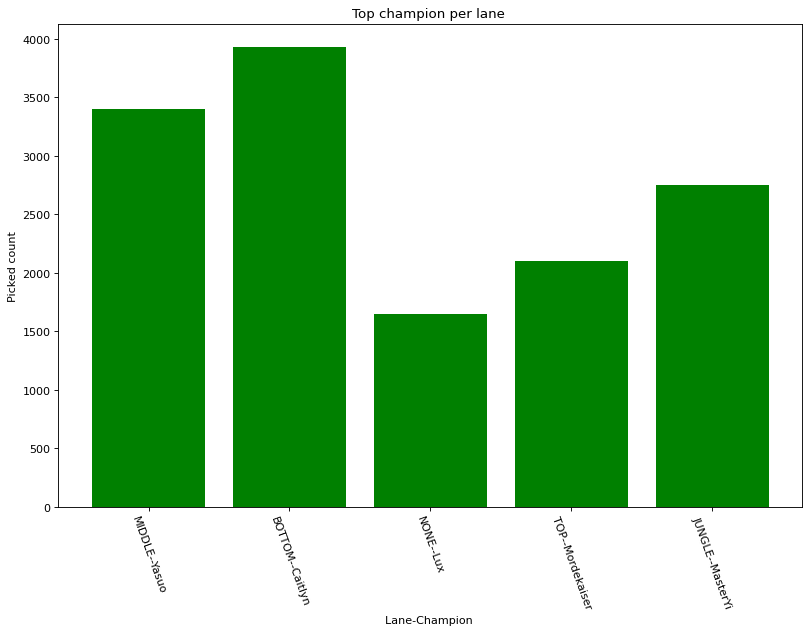

In [ ]:
figure(figsize=(12, 8), dpi=80)
plt.bar(X,height,color='green')
plt.title('Top champion per lane ')
plt.xlabel('Lane-Champion ')
plt.ylabel('Picked count')
plt.xticks( rotation = -70 )
plt.show()

### Task4:

In [ ]:
def get_lane_champion(match):
  duos = []
  participants = []
  champions_lane = []

  for i in range(len(match['info']['participants'])):
    if  match['info']['participants'][i]['win']==True:
      participants.append( match['info']['participants'][i])

  for participant in participants:
    champions_lane.append(( participant['lane'] , participant['championName']))

  for i in champions_lane:
      duos.append((i, 1))
  return duos

In [ ]:
def most_count(a,b):
  if a[1]> b[1]:
   return  a
  else:
   return b

In [ ]:

# Get combination between Wining champoins and the items they used
champoin_lane = data_rdd.map(get_lane_champion)

# Get count all Wining champoins and corresponding items pairs
champoin_lane_count = champoin_lane.flatMap(lambda x: x).reduceByKey(add).map(lambda x: (x[0][0],(x[0][1],x[1])))
most_champoin_lane = champoin_lane_count.reduceByKey(most_count)


In [ ]:
Most_lane = most_champoin_lane.take(10)

In [ ]:
Most_lane

[('MIDDLE', ('Yasuo', 3403)),
 ('BOTTOM', ('Caitlyn', 3931)),
 ('NONE', ('Lux', 1648)),
 ('TOP', ('Mordekaiser', 2099)),
 ('JUNGLE', ('MasterYi', 2753))]

In [ ]:
X = []
height  = []
for pair, count in Most_lane:
    duo_1 = pair
    duo_2 = count[0]
    X.append(duo_1+"--"+duo_2)
    height.append(count[1])

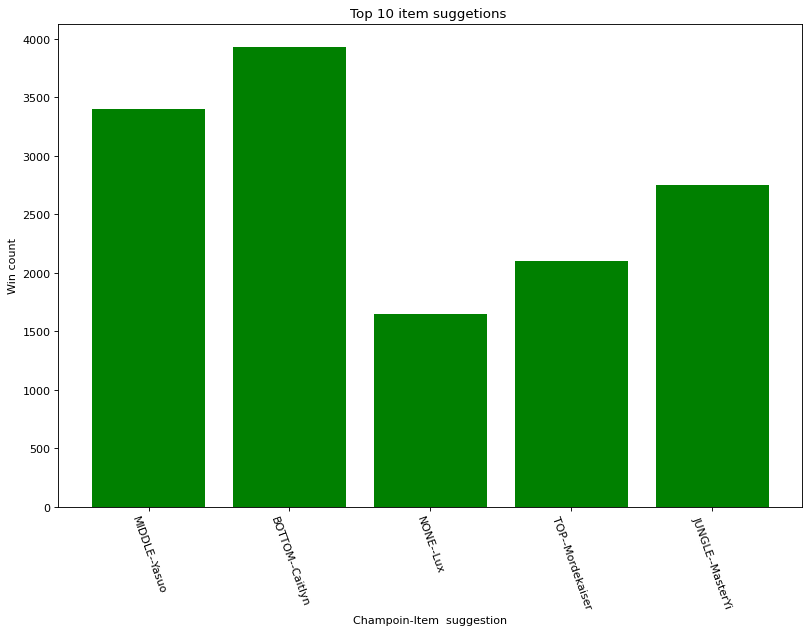

In [ ]:
figure(figsize=(12, 8), dpi=80)
plt.bar(X,height,color='green')
plt.title('Top 10 item suggetions ')
plt.xlabel('Champoin-Item  suggestion')
plt.ylabel('Win count')
plt.xticks( rotation = -70 )
plt.show()